In [98]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt

In [6]:
# Find out Efficient Frontier Strategy, run MonteCarlo Simulation
# For MonteCarlo Simulation, generate random portfolios weights
# Assain random weights to portfolio stocks based on stock selection process
# Download 5 year historical price data from Yahoo finance
# Run MonteCarlo Simulation, find out Maximum Sharpe Ratio Portfolio, Minimum Volatiltiy Portfolio

In [99]:
randmin = 0.005  # minimum 0.5%
randmax = 0.2    # maxiimum 20%

def randomrange(N):
  result = np.array(np.repeat(1/N,N)) 
  for i in range(100):                             
    eps = np.random.uniform(low=randmin,high=randmax,size= 1)
    which = np.random.randint(0,N,2)
    #print(result[which[0]],result[which[1]])
    if ((result[which[0]]+eps)<=randmax)&((result[which[1]]-eps)>=randmin):
      result[which[0]] = result[which[0]]+eps
      result[which[1]] = result[which[1]]-eps

  return result

In [100]:
# Portfolio stock tickers for yahoo finance stock price download

assets=['AAPL', 'ABT', 'ADBE', 'AMD', 'AVGO', 'CPB', 'CRM', 'DLR', 'EL', 'ETSY', 'FCX', 
           'FTNT', 'GOOG', 'LULU', 'MRK', 'MS', 'NFLX', 'NVDA', 'NXPI', 'QCOM', 'REGN', 
           'RF', 'TXN','TSLA']

In [101]:
# Download 5-year daily historical price of the portfolio stocks

df = pd.DataFrame()

s_date="2016-12-31" # Start date

e_date="2021-12-31" # End Date


df = yf.download(assets, start=s_date, end=e_date,
        interval='1d')["Adj Close"]

df.head()


[*********************100%***********************]  24 of 24 completed


,AAPL,ABT,ADBE,AMD,AVGO,CPB,CRM,DLR,EL,ETSY,...,MRK,MS,NFLX,NVDA,NXPI,QCOM,REGN,RF,TSLA,TXN
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-30,26.982428,34.085175,102.949997,11.34,141.715027,49.035637,68.459999,77.234192,71.400558,11.78,...,45.706352,35.167679,123.800003,26.303894,90.656487,53.456436,367.089996,11.406775,14.246000,60.940548
2017-01-03,27.059309,34.653118,103.480003,11.43,142.973694,49.173492,70.540001,78.098824,72.184677,11.88,...,46.700119,35.833584,127.489998,25.138283,90.332748,53.620422,379.700012,11.462381,14.466000,61.449978
2017-01-04,27.029026,34.928211,104.139999,11.43,141.955490,49.514076,72.800003,80.574783,73.463501,11.97,...,46.684601,36.308022,129.410004,25.724781,90.924721,53.677807,383.109985,11.613305,15.132667,61.374821
2017-01-05,27.166473,35.229942,105.910004,11.24,139.718765,49.408657,72.790001,82.720619,73.370171,12.40,...,46.669071,35.975079,131.809998,25.071745,91.017212,53.743408,380.920013,11.462381,15.116667,60.898796
2017-01-06,27.469336,36.188335,108.300003,11.32,141.570663,49.222149,73.800003,81.777405,73.892906,13.08,...,46.793301,36.499470,131.070007,25.406889,90.841469,53.726997,358.679993,11.502096,15.267333,61.926025


In [102]:
# make portfolio

def make_portfolio(data,N): ## data from yahoo finance price information, N is number of simulations  
  log_return = np.log(1 + data.pct_change())

  # len(assets) for number of stocks in the portfolio
  number_of_symbol = len(assets)
  rebalance_weights = randomrange(number_of_symbol)   # Generate Random Weights.
 
  #rebalance_weights = random_weights
  # Calculate the Expected Returns, annualize it by multiplying it by `252`.
  exp_ret = np.sum((log_return.mean() * rebalance_weights) * 252)
  
  # Calculate the Expected Volatility, annualize it by multiplying it by `252`.
  exp_vol = np.sqrt(np.dot(rebalance_weights.T,np.dot(log_return.cov() * 252, rebalance_weights)))

  # Calculate the Sharpe Ratio.
  sharpe_ratio = exp_ret / exp_vol

  num_of_portfolios = N

  # Array to store the weights N iterations for each of symbols.
  all_weights = np.zeros((num_of_portfolios, number_of_symbol))

  # Array to store the returns, N possible return values.
  ret_arr = np.zeros(num_of_portfolios)

  # Array to store the volatilities, N possible volatility values.
  vol_arr = np.zeros(num_of_portfolios)

  # Array to store the Sharpe Ratios, N possible Sharpe Ratios.
  sharpe_arr = np.zeros(num_of_portfolios)

  # Start the simulations.
  for ind in range(num_of_portfolios):
     
      # First, calculate the weights.
      weights = randomrange(number_of_symbol)
      # Add the weights, to the `weights_arrays`.
      all_weights[ind, :] = weights

      # Calculate the expected log returns, add them to the `returns_array`.
      ret_arr[ind] = np.sum((log_return.mean() * weights) * 252)

      # Calculate the volatility, add them to the `volatility_array`.
      vol_arr[ind] = np.sqrt(
          np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
      )

      # Calculate the Sharpe Ratio, add it to the `sharpe_ratio_array`.
      sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
      
  # Create a DataFrame, with the weights, the returns, the volatility, and the Sharpe Ratio
  simulations_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

  # Create a DataFrame from it, then Transpose.
  simulations_df = pd.DataFrame(data=simulations_data).T

  # Give the columns the Proper Names.
  simulations_df.columns = [
      'Returns',
      'Volatility',
      'Sharpe Ratio',
      'Portfolio Weights'
  ]

  
  simulations_df = simulations_df.infer_objects()

  # Return the Max Sharpe Ratio from the run.
  max_sharpe_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]

  # Return the Min Volatility from the run.
  min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]

  maxSharp = simulations_df['Sharpe Ratio'].max()
  minVol = simulations_df['Volatility'].min()

  maxSharp_df = simulations_df[(simulations_df['Sharpe Ratio']==maxSharp)]
  minVol_df = simulations_df[(simulations_df['Volatility']==minVol)]
  maxSharp_wgt = pd.DataFrame(index = log_return.columns, data = maxSharp_df['Portfolio Weights'].values[0],columns=['Max. SharpeRatio Weight'])
  minVol_wgt = pd.DataFrame(index = log_return.columns, data = minVol_df['Portfolio Weights'].values[0],columns=['Min. Volatitly Weight'])

  print(max_sharpe_ratio)
  print(min_volatility)

  plt.figure(figsize=(16,10))
  plt.scatter(
     y=simulations_df['Returns'],
    x=simulations_df['Volatility'],
    c=simulations_df['Sharpe Ratio'],
    cmap='RdYlBu',
    s=10
    )
  # Give the Plot some labels, and titles.
  plt.title('Efficient Frontier')
  
  # plt.colorbar(label='Sharpe Ratio')
  plt.xlabel('Standard Deviation')
  plt.ylabel('Returns')
  
  #Chart Scale set
  plt.xlim(simulations_df['Volatility'].min()-0.02,simulations_df['Volatility'].max()+0.02)
  plt.ylim(simulations_df['Returns'].min()-0.02,simulations_df['Returns'].max()+0.02)

  # Plot the Max Sharpe Ratio, using a `Red Star`.
  plt.scatter(
    max_sharpe_ratio[1],
    max_sharpe_ratio[0],
    marker=(6, 1, 0),
    color='b',
    s=100,
    label = 'Max. Sharpe ratio' ## legend 표시 
    )
  # Plot the Min Volatility, using a `Blue Star`.
  plt.scatter(
    min_volatility[1],
    min_volatility[0],
    marker=(3, 1, 0),
    color='r',
    s=100,
    label = 'Min. Volatility' ## legend 표시 
    )
  plt.legend()
  # Finally, show the plot.
  plt.show()
  
  return maxSharp_wgt, minVol_wgt,simulations_df



Returns                                                       0.347962
Volatility                                                    0.243263
Sharpe Ratio                                                  1.430395
Portfolio Weights    [0.0556699992808881, 0.030031041022021032, 0.0...
Name: 4359, dtype: object
Returns                                                       0.227244
Volatility                                                    0.199463
Sharpe Ratio                                                  1.139279
Portfolio Weights    [0.021061053001842123, 0.041666666666666664, 0...
Name: 3864, dtype: object


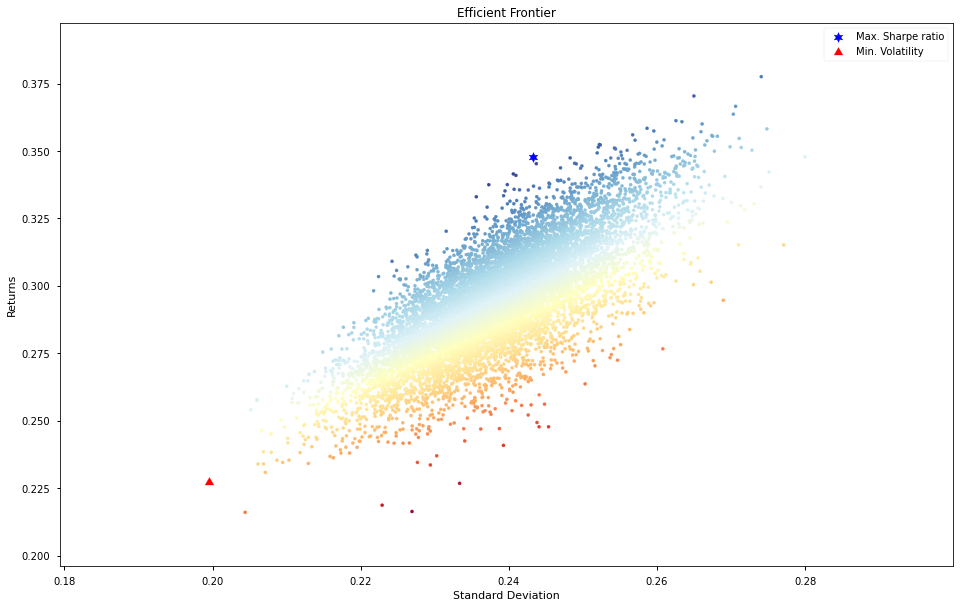

In [103]:
# MonteCarlo simulation for find out Max SharpeRatio Portfolio and Min. Volatility Portfolio
# 10,000 times simulation
# Use make_portfolio function

efficientFrontier = make_portfolio(df,10000)  


In [104]:
# Maximum Sharpe Ratio Portfolio

efficientFrontier[0]

,Max. SharpeRatio Weight
AAPL,0.055670
ABT,0.030031
ADBE,0.030892
AMD,0.019033
AVGO,0.048917
CPB,0.041667
CRM,0.026442
DLR,0.041667
EL,0.061738
ETSY,0.098331


In [105]:
# Minimum Volatility Portfolio

efficientFrontier[1]

,Min. Volatitly Weight
AAPL,0.021061
ABT,0.041667
ADBE,0.029947
AMD,0.041667
AVGO,0.041667
CPB,0.164171
CRM,0.012261
DLR,0.118722
EL,0.051441
ETSY,0.006098


1 Daily Charts of AAPL


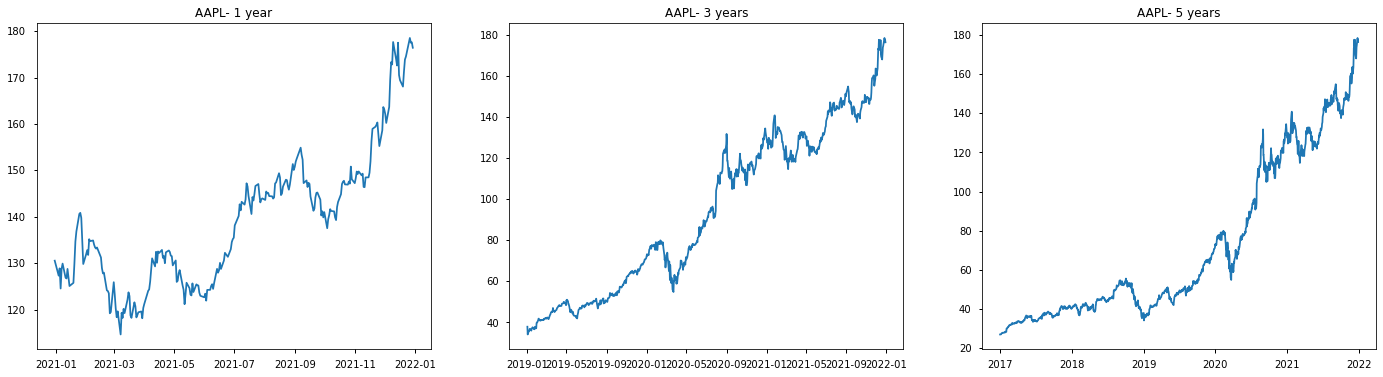

2 Daily Charts of ABT


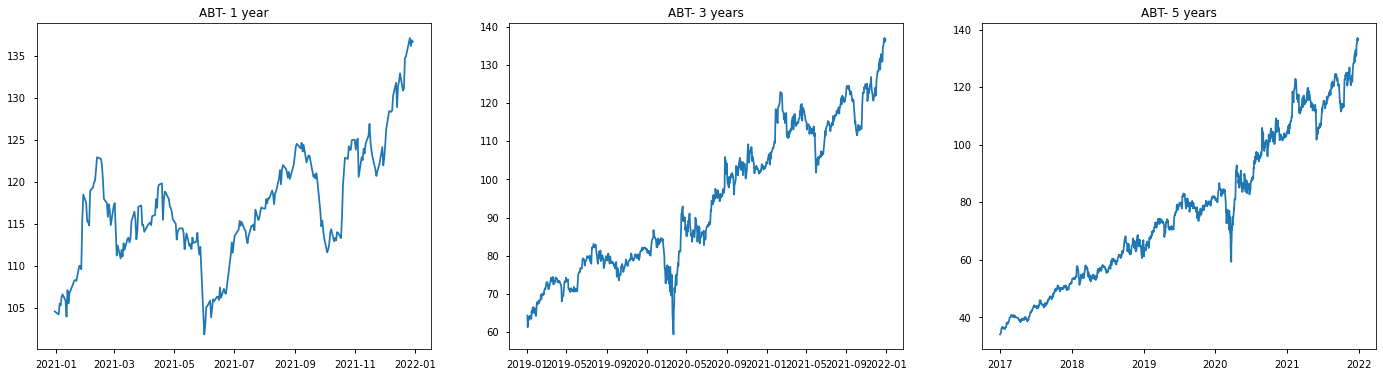

3 Daily Charts of ADBE


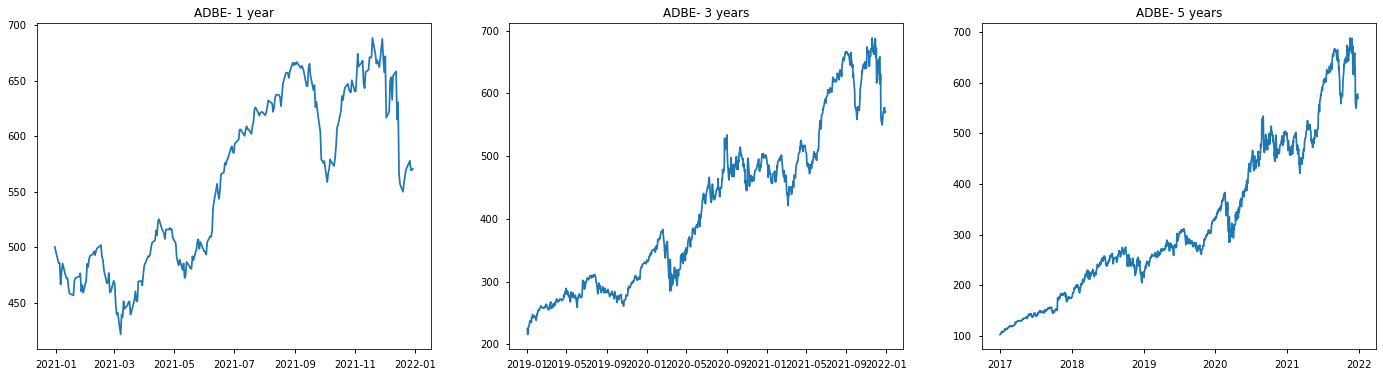

4 Daily Charts of AMD


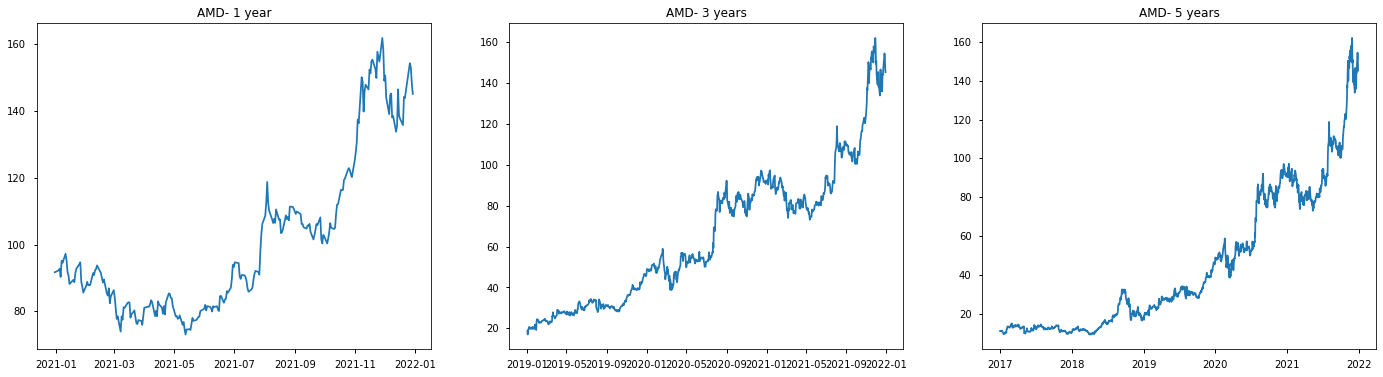

5 Daily Charts of AVGO


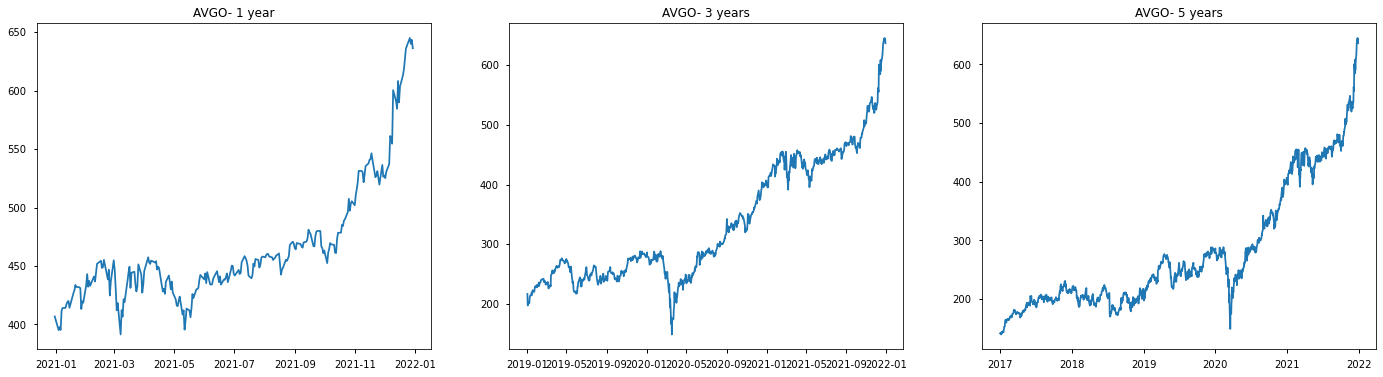

6 Daily Charts of CPB


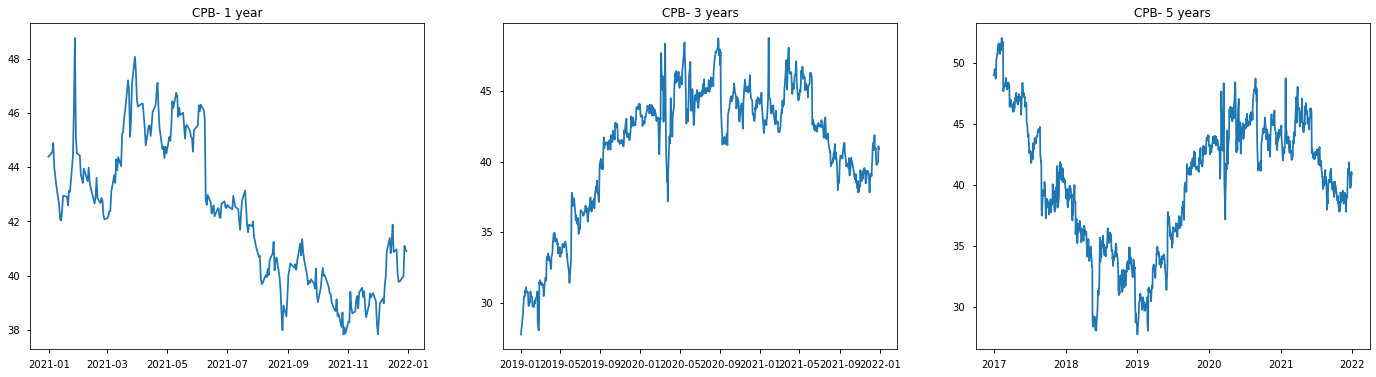

7 Daily Charts of CRM


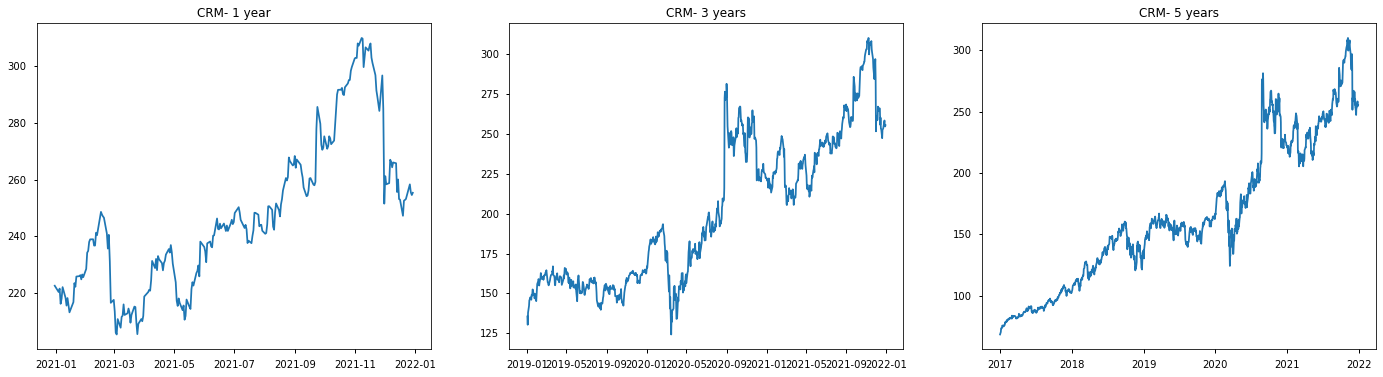

8 Daily Charts of DLR


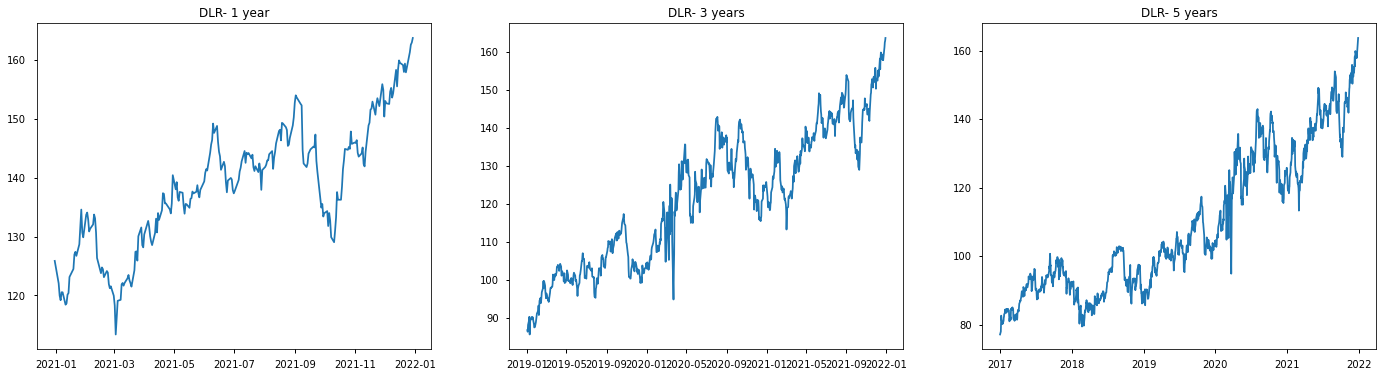

9 Daily Charts of EL


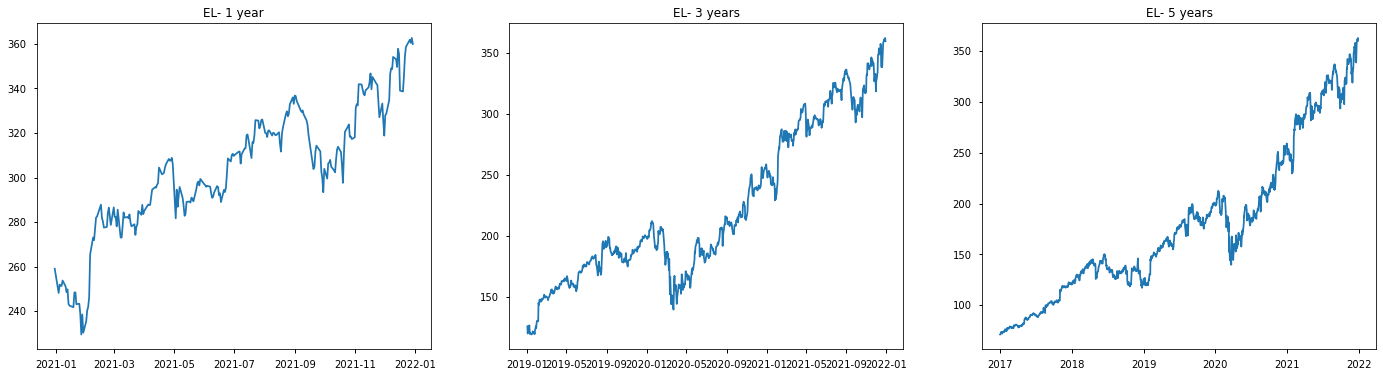

10 Daily Charts of ETSY


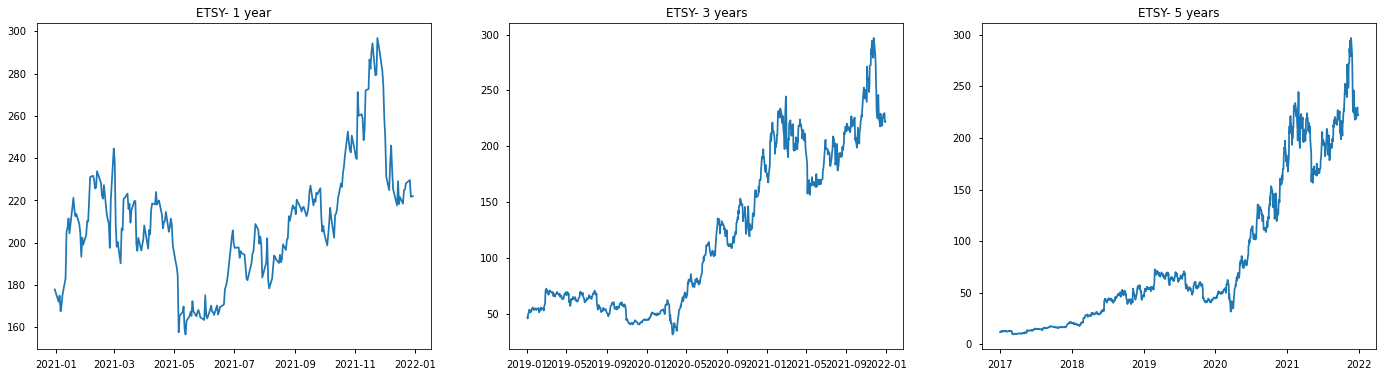

11 Daily Charts of FCX


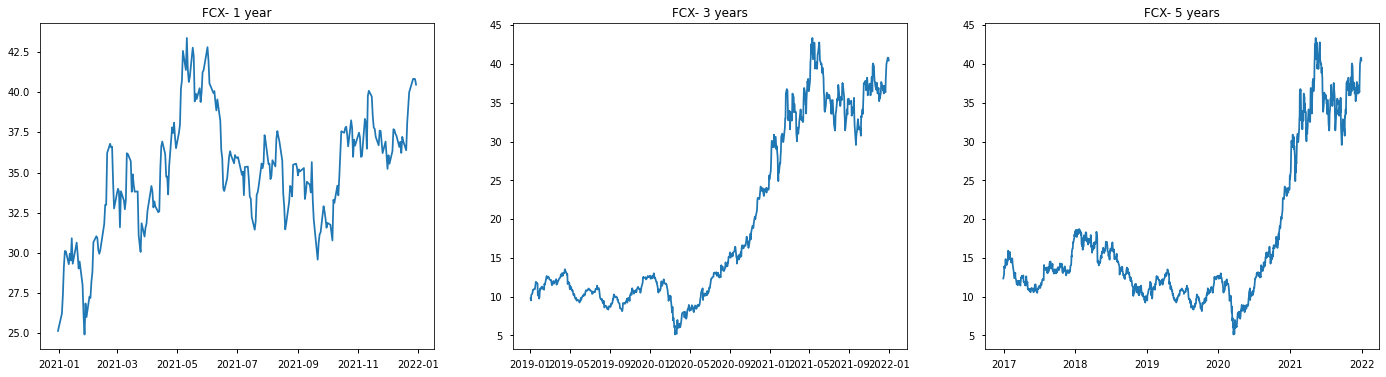

12 Daily Charts of FTNT


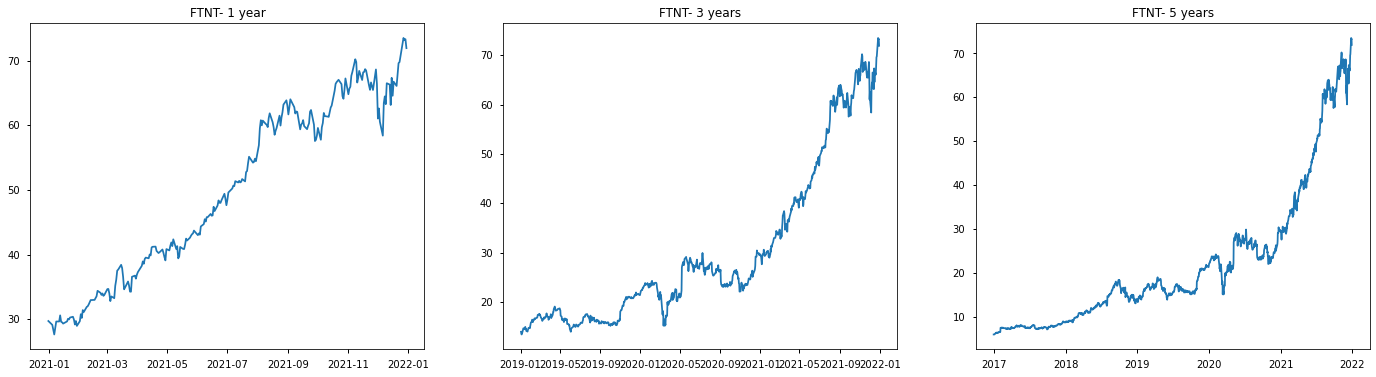

13 Daily Charts of GOOG


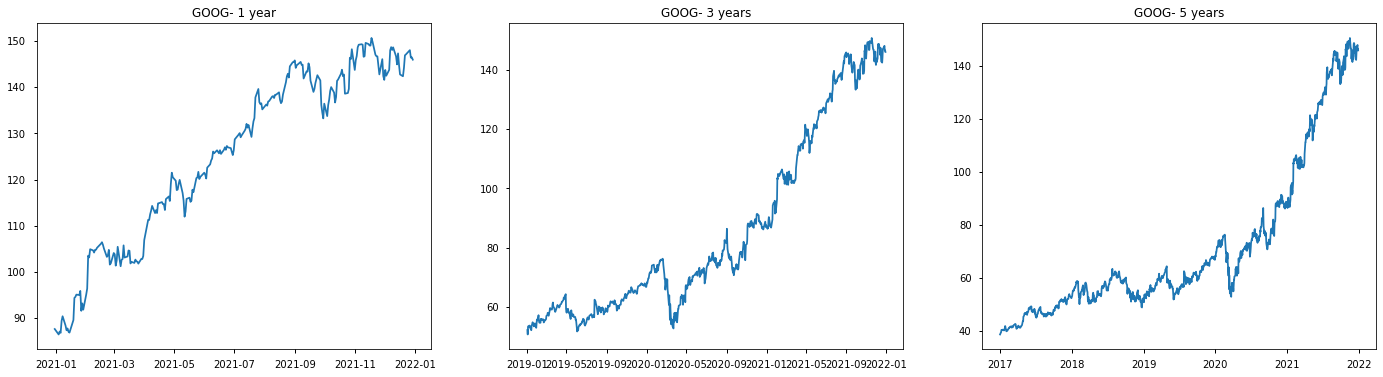

14 Daily Charts of LULU


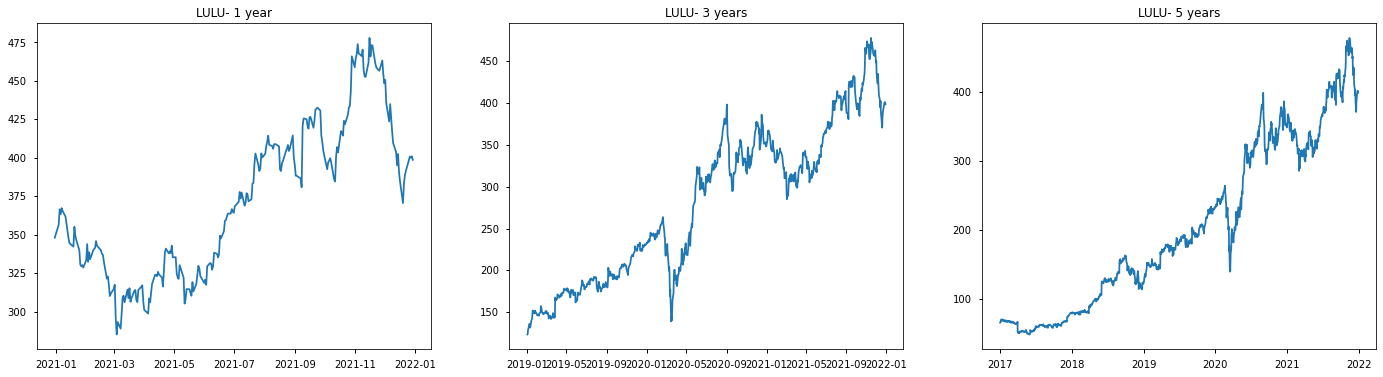

15 Daily Charts of MRK


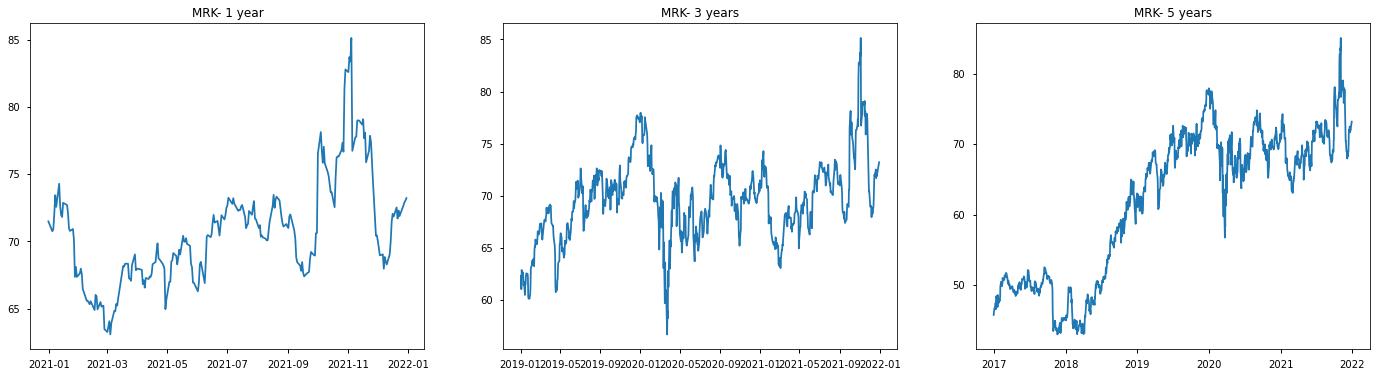

16 Daily Charts of MS


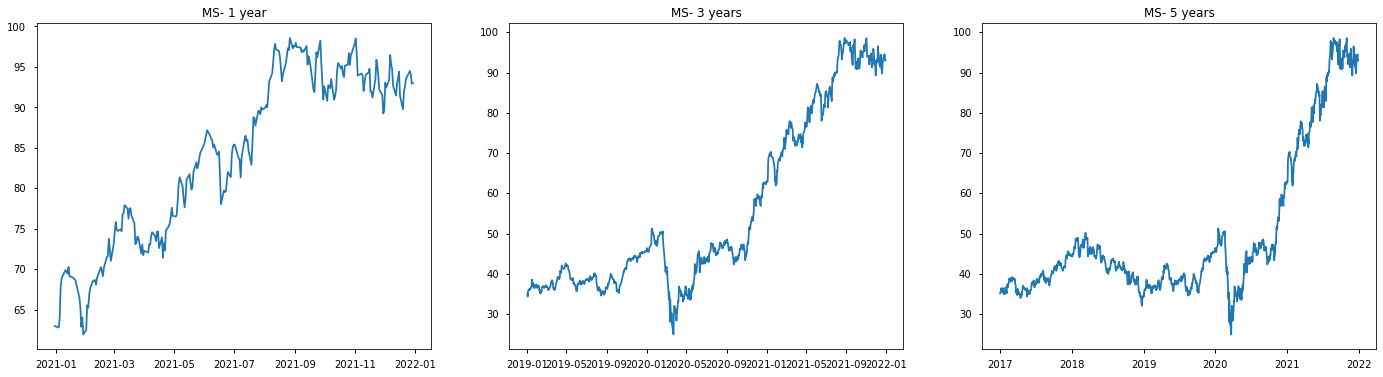

17 Daily Charts of NFLX


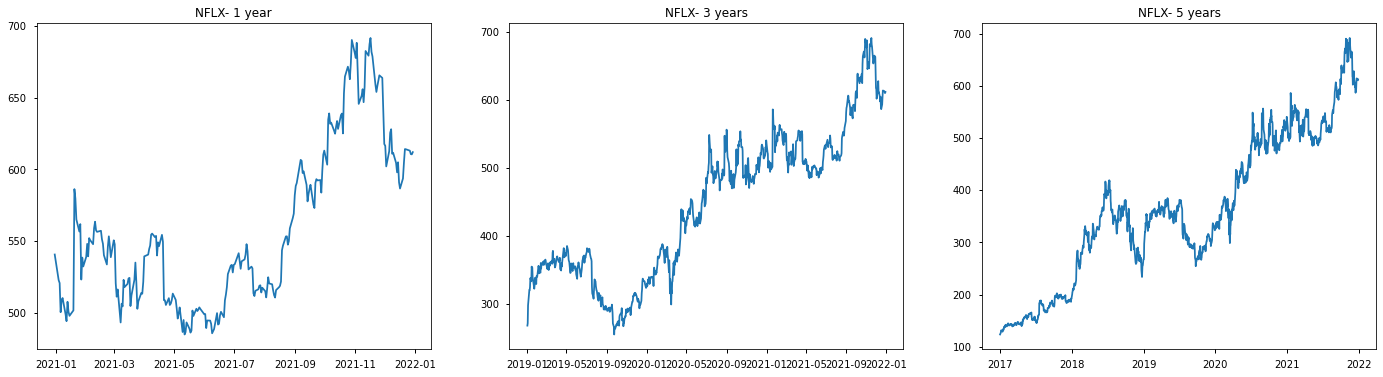

18 Daily Charts of NVDA


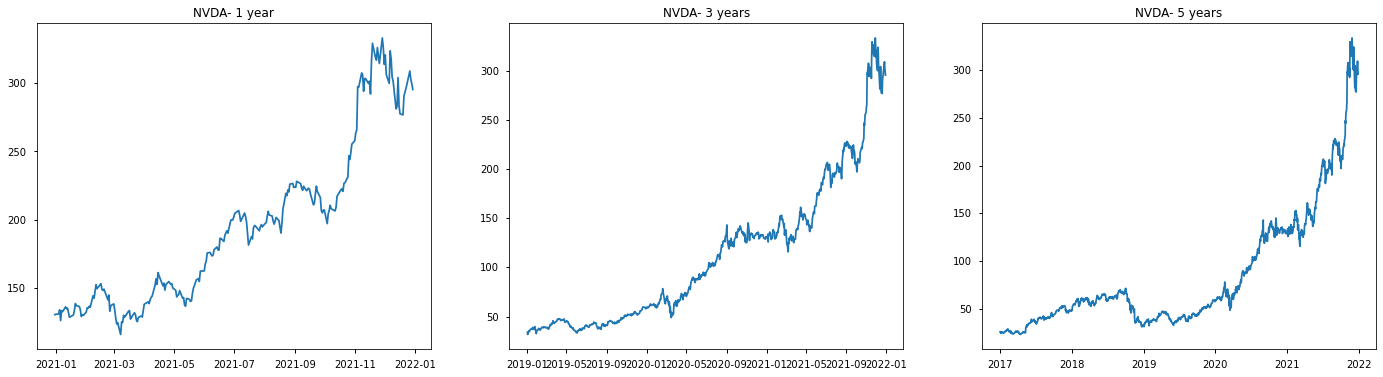

19 Daily Charts of NXPI


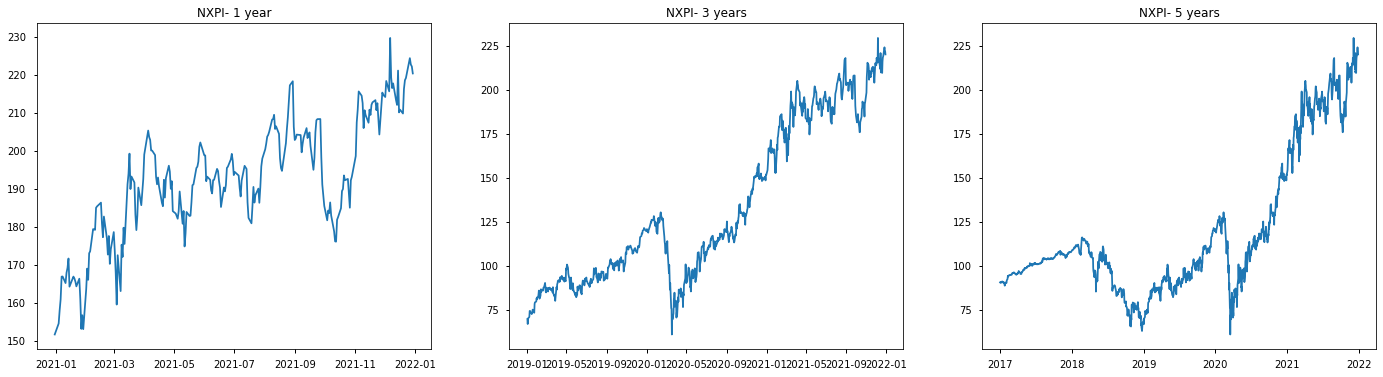

20 Daily Charts of QCOM


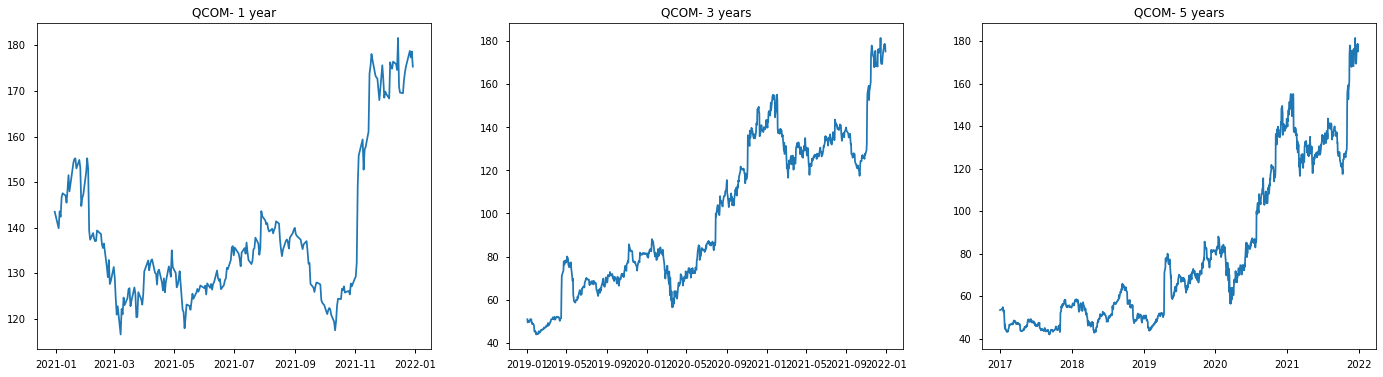

21 Daily Charts of REGN


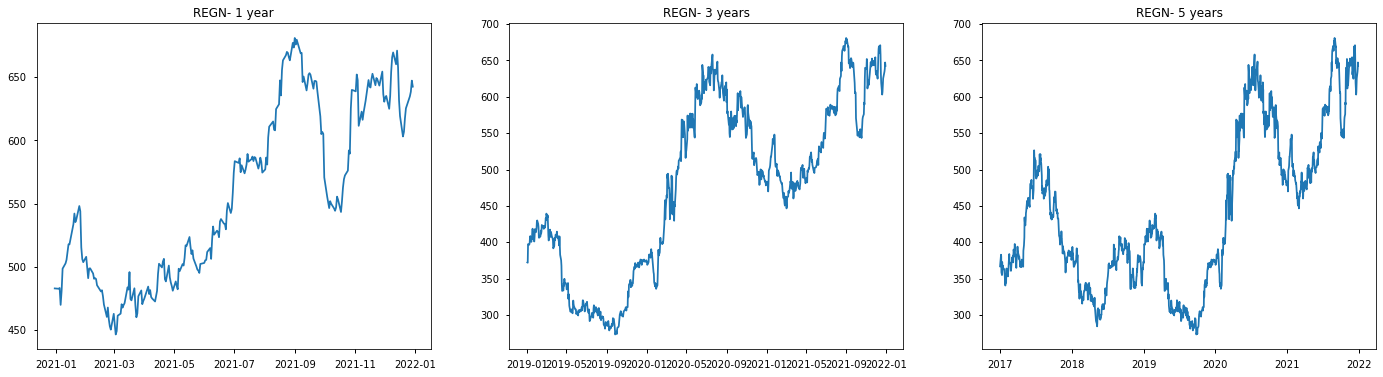

22 Daily Charts of RF


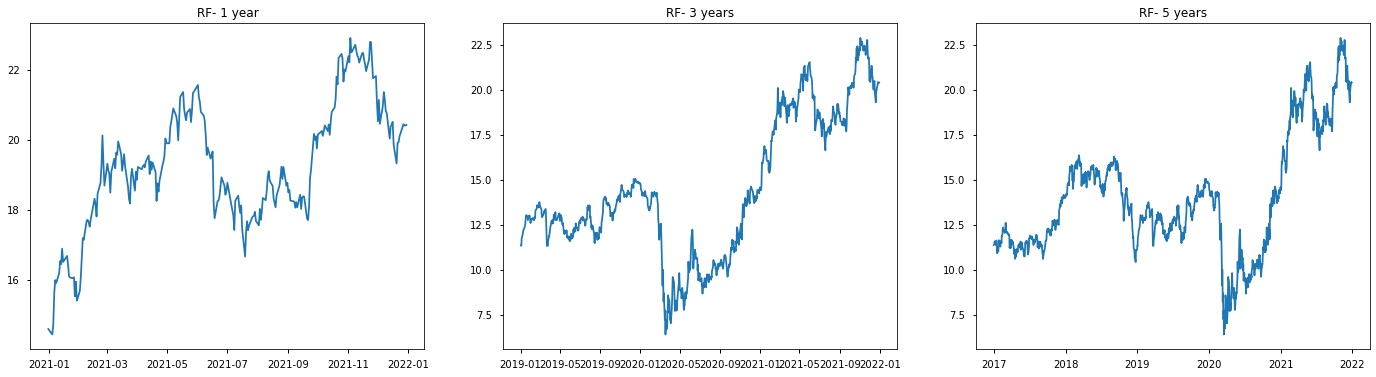

23 Daily Charts of TSLA


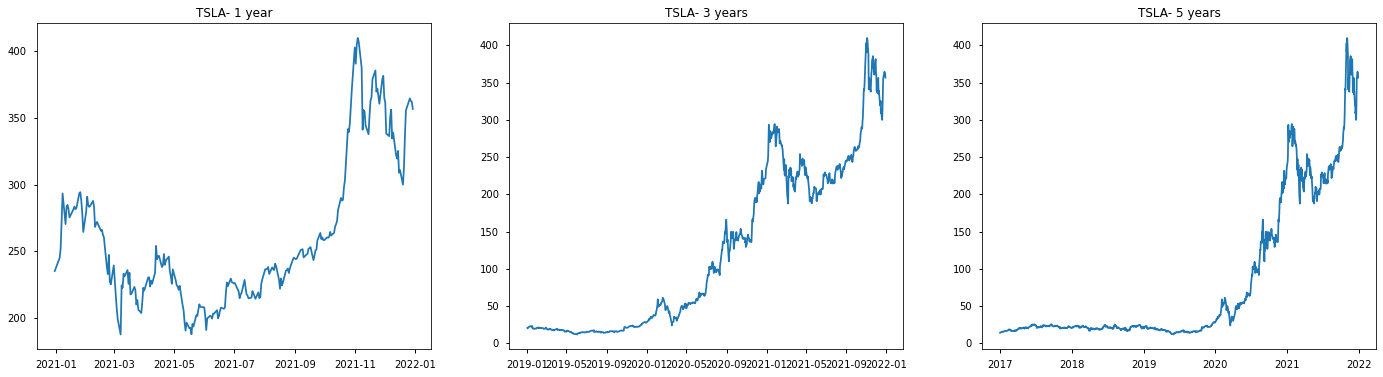

24 Daily Charts of TXN


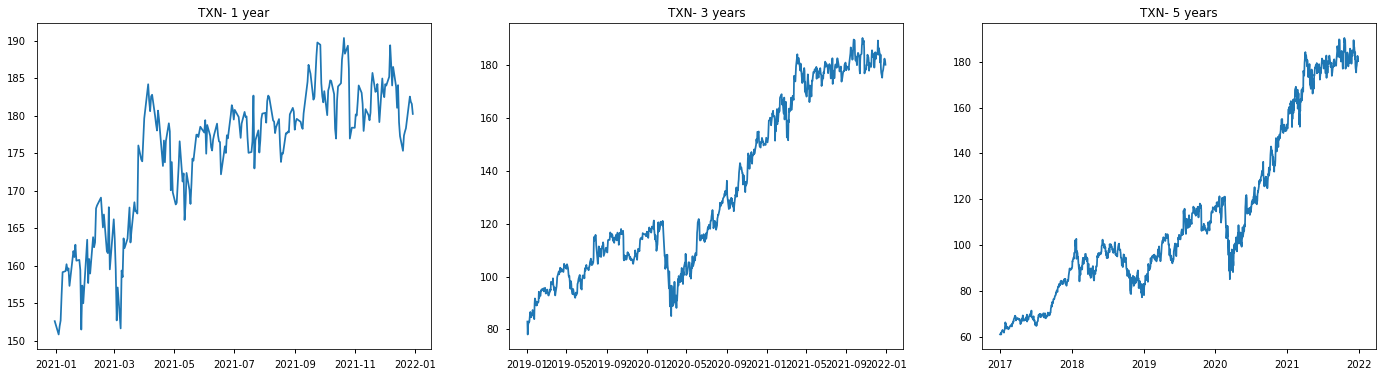

In [106]:
# line chart of portfolio stocks with 3 column subplot[1 year, 3 year, 5 year]

ct=0
for n in df :
    ct=ct+1
    print(ct,"Daily Charts of", n)
    plt.figure(figsize=(24,6))
    plt.subplot(1,3,1)
    plt.title(n + '- 1 year')
    plt.plot(df[n].iloc[-252:])    
    #plt.show() 

    plt.subplot(1,3,2)
    plt.title(n + '- 3 years')
    plt.plot(df[n].iloc[-252*3:]) 
    
    plt.subplot(1,3,3)
    plt.title(n + '- 5 years')
    plt.plot(df[n].iloc[-252*5:]) 

    plt.show() 